In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
import yfinance as yf

In [30]:
stock_name = "TSLA"
stock_info = yf.Ticker(stock_name)
df = stock_info.history(period="3y")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-15 00:00:00-04:00,231.363327,237.726669,228.013336,235.979996,88006800,0.0,0.0
2021-03-16 00:00:00-04:00,234.449997,235.973328,223.666672,225.626663,96587100,0.0,0.0
2021-03-17 00:00:00-04:00,218.956665,234.576660,217.003326,233.936661,121117500,0.0,0.0
2021-03-18 00:00:00-04:00,228.096664,229.743332,217.333328,217.720001,99674400,0.0,0.0
2021-03-19 00:00:00-04:00,215.533340,219.076660,208.206665,218.289993,128682000,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-07 00:00:00-05:00,174.350006,180.039993,173.699997,178.649994,102129000,0.0,0.0
2024-03-08 00:00:00-05:00,181.500000,182.729996,174.699997,175.339996,85315300,0.0,0.0
2024-03-11 00:00:00-04:00,175.449997,182.869995,174.800003,177.770004,85391500,0.0,0.0


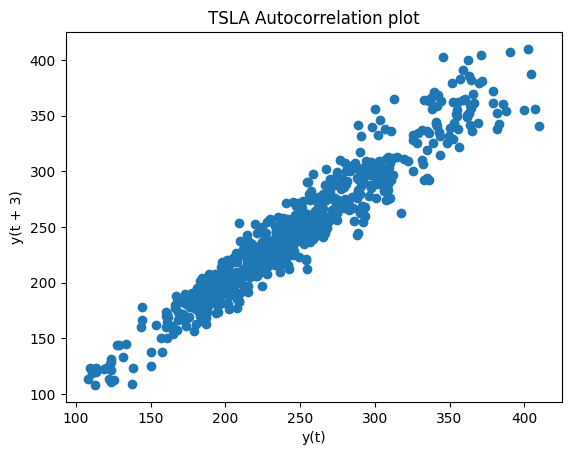

In [23]:
plt.figure()
lag_plot(df['Close'], lag=3)
plt.title(stock_name + ' Autocorrelation plot')
plt.show()

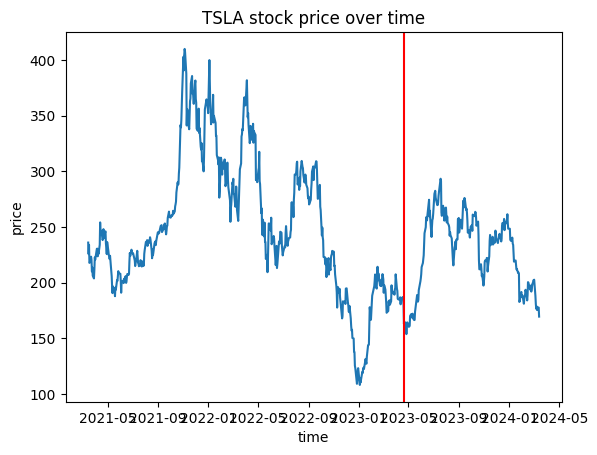

In [24]:
# plot df
plt.plot(df.index.values, df["Close"])
plt.axvline(df.index.values[int(len(df)*0.7)], color='red')
plt.title(stock_name + " stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [25]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 47.87971357011425


AttributeError: 'DataFrame' object has no attribute 'Date'

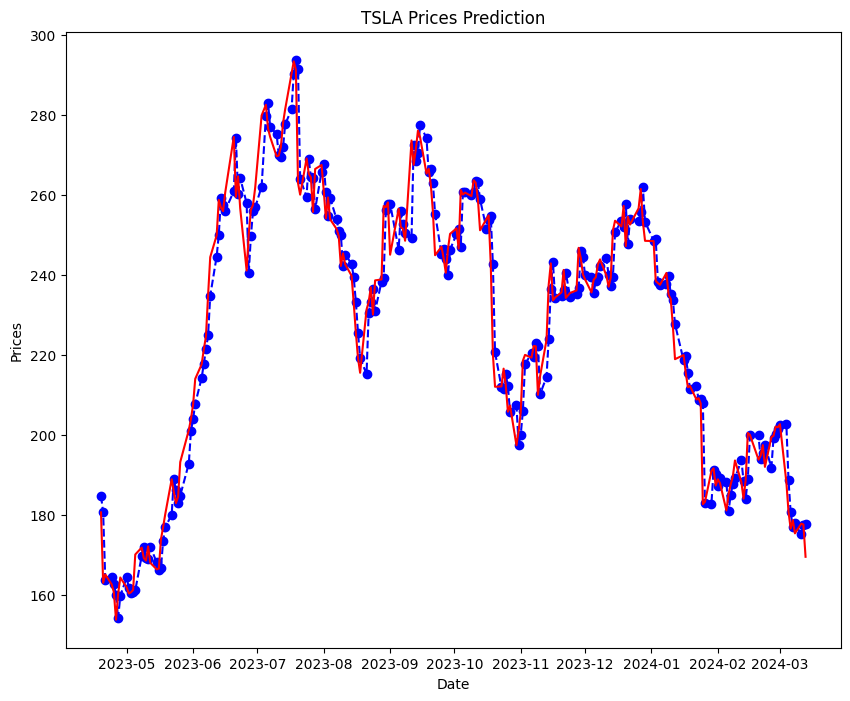

In [26]:
test_set_range = df[int(len(df)*0.7):].index
figure(figsize=(10, 8), dpi=100)
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title(stock_name + ' Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0,len(test_set_range)), df.Date[0:len(test_set_range)])
plt.legend()
plt.show()